# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda II

Vamos continuar trabalhando com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

##### Carregando Pacotes:

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

import warnings

%matplotlib inline

In [5]:
warnings.filterwarnings('ignore')

##### Leitura do DataFrame:

In [7]:
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

##### Análise dos metadados do DataFrame:

In [10]:
metadados = pd.DataFrame({'dtypes': df.dtypes})
metadados['non_null'] = df.count()
metadados['missing'] = df.isnull().sum()
metadados['perc_missing'] = round((metadados['missing']/df.shape[0])*100) 
metadados['valores_unicos'] = df.nunique()

metadados

,dtypes,non_null,missing,perc_missing,valores_unicos
Unnamed: 0,int64,15000,0,0.0,15000
data_ref,object,15000,0,0.0,15
id_cliente,int64,15000,0,0.0,9845
sexo,object,15000,0,0.0,2
posse_de_veiculo,bool,15000,0,0.0,2
posse_de_imovel,bool,15000,0,0.0,2
qtd_filhos,int64,15000,0,0.0,8
tipo_renda,object,15000,0,0.0,5
educacao,object,15000,0,0.0,5
estado_civil,object,15000,0,0.0,5


Dentro do DataFrame a variável ```tempo_emprego``` é a única que possui missing values, vale então verificar sua distribução.

##### Verificando a distribuição dos missing values e os valores da variável ```tempo_emprego```:

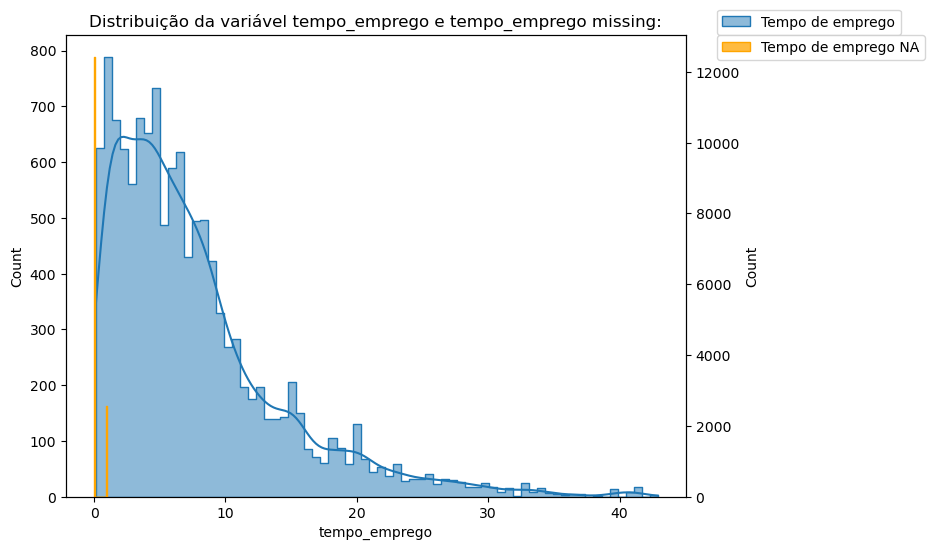

In [13]:
df['tempo_emprego_na'] = df['tempo_emprego'].isna()
plt.rc('figure', figsize=(8, 6))

ax = sns.histplot(data=df,
             x='tempo_emprego',
             kde=True,
             element='step',
             label='Tempo de emprego'
            )

ax2 = ax.twinx()
ax2= sns.histplot(data=df,
             x='tempo_emprego_na',
             element='step',
             color ='Orange',
             label='Tempo de emprego NA'
            )
plt.title('Distribuição da variável tempo_emprego e tempo_emprego missing:')
ax2.legend(bbox_to_anchor = (1.05, 1),
           loc = 2,
           borderaxespad = 0
           )

ax.legend(bbox_to_anchor = (1.05, 1),
          loc = 3,
          borderaxespad = 0
         )

De acordo com o gráfico e os metadados avaliados acima os missing values para a variável ```tempo_emprego``` não estão gerando desbalanço nos dados, portato vale apenas os deletar.

##### Função para filtrar o DataFrame:

In [16]:
def filter(df):
    df.drop(columns=['Unnamed: 0','tempo_emprego_na', 'id_cliente', 'data_ref'], inplace=True)
    df.dropna(inplace=True)
    print(f'Linhas: {df.shape[0]} \nColunas: {df.shape[1]}')
    df['posse_de_veiculo'] = df['posse_de_veiculo'].astype(str)
    df['posse_de_imovel'] = df['posse_de_imovel'].astype(str)
    
    return df.head()

In [17]:
filter(df)

Linhas: 12427 
Colunas: 12


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


##### Verifica a nova distribuição de valores da variável ```tempo_emprego```:

Text(0.5, 1.0, 'Distribuição da variável tempo_emprego sem missing:')

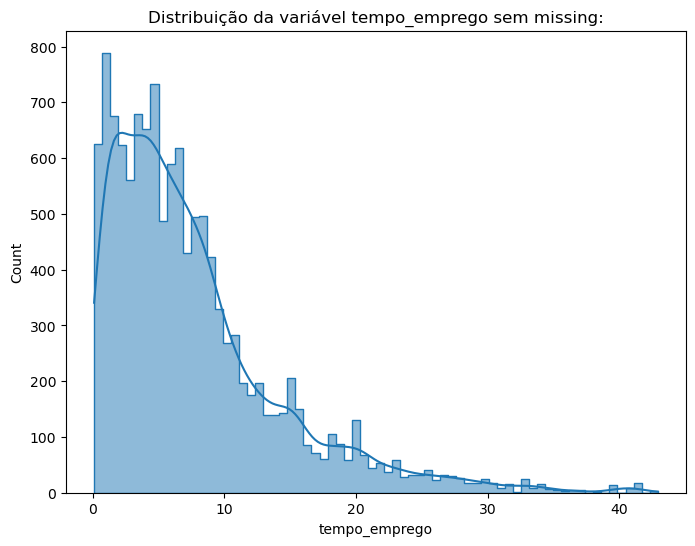

In [19]:
sns.histplot(data=df,
             x='tempo_emprego',
             kde=True,
             element='step',
            )
plt.title('Distribuição da variável tempo_emprego sem missing:')

##### Metadados do DataFrame filtrado e valor de maior frequência das variáveis:

In [21]:
metadados = pd.DataFrame({'dtypes': df.dtypes})
metadados['non_null'] = df.count()
metadados['missing'] = df.isnull().sum()
metadados['perc_missing'] = round((metadados['missing']/df.shape[0])*100) 
metadados['valores_unicos'] = df.nunique()
freq_dict = {}
for nome, valores in df.items():
    freq_dict[nome] = valores.mode()[0]
freq = pd.DataFrame.from_dict(freq_dict, orient = 'index', columns=['freq'])
metadados['maior_freq'] = freq['freq']

metadados

,dtypes,non_null,missing,perc_missing,valores_unicos,maior_freq
sexo,object,12427,0,0.0,2,F
posse_de_veiculo,object,12427,0,0.0,2,False
posse_de_imovel,object,12427,0,0.0,2,True
qtd_filhos,int64,12427,0,0.0,8,0
tipo_renda,object,12427,0,0.0,5,Assalariado
educacao,object,12427,0,0.0,5,Secundário
estado_civil,object,12427,0,0.0,5,Casado
tipo_residencia,object,12427,0,0.0,6,Casa
idade,int64,12427,0,0.0,46,40
tempo_emprego,float64,12427,0,0.0,2589,4.216438


1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).
2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?
3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?
4. Rode um modelo *stepwise*. Avalie o $R^2$ na vase de testes. Qual o melhor resultado?
5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?
6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.
7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.

##### Separando a base de dados em variáveis preditoras e alvo:

In [24]:
X, y = df.drop('renda', axis=1), df['renda']

##### Separando a base em treino e teste:

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [27]:
Xy_train = pd.concat([X_train, y_train], axis=1)

##### Regularização ridge:

Seleciona a categoria mais frequente de cada variável categorica

In [30]:
categorical_cols = list(df.select_dtypes('object').columns)
most_frequent_categories = {col: df[col].mode()[0] for col in categorical_cols}

Roda a regularização ridge para diferentes valores de alpha

In [32]:
md = smf.ols('np.log(renda) ~ C(sexo, Treatment(reference="{}")) + C(posse_de_veiculo, Treatment(reference="{}")) + C(posse_de_imovel, Treatment(reference="{}")) + qtd_filhos + C(tipo_renda, Treatment(reference="{}")) + C(educacao, Treatment(reference="{}")) + C(estado_civil, Treatment(reference="{}")) + C(tipo_residencia, Treatment(reference="{}")) + idade + tempo_emprego + qt_pessoas_residencia'.format(
    most_frequent_categories['sexo'],
    most_frequent_categories['posse_de_veiculo'],
    most_frequent_categories['posse_de_imovel'],
    most_frequent_categories['tipo_renda'],
    most_frequent_categories['educacao'],
    most_frequent_categories['estado_civil'],
    most_frequent_categories['tipo_residencia']
),data=Xy_train)

alphas = [0, 0.001, 0.005, 0.01, 0.05, 0.1]

MSE_ridge = {}
r_quad_ridge = {}
adj_r_quad_ridge = {}
aic_ridge = {}
bic_ridge = {}

for i in alphas:
    reg = md.fit_regularized(method = 'elastic_net',
                             refit = True,
                             L1_wt = 0.01,
                             alpha = i)

    y_pred = np.exp(reg.predict(X_test))
    mse = mean_squared_error(y_test, y_pred)
    
    MSE_ridge[i] = mse
    r_quad_ridge[i] = round(reg.rsquared,3)
    adj_r_quad_ridge[i] = round(reg.rsquared_adj,3)
    aic_ridge[i] = round(reg.aic,3)
    bic_ridge[i] = round(reg.bic,3)
    
    print(f'\n\n Valor de alpha = {i} \n MSE: {mse}\n\n {reg.summary()}')



 Valor de alpha = 0 
 MSE: 64004726.11867148

                             OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     205.4
Date:                Fri, 30 Aug 2024   Prob (F-statistic):               0.00
Time:                        22:07:03   Log-Likelihood:                -10120.
No. Observations:                9320   AIC:                         2.029e+04
Df Residuals:                    9295   BIC:                         2.048e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

##### Tabela de parâmetros para a regularização Ridge:

Unifica as informações para melhor comparação e seleção

In [35]:
parametros_ridge = pd.DataFrame({'MSE': MSE_ridge})
parametros_ridge['R_quadrado'] = r_quad_ridge
parametros_ridge['R_quadrado_ajustado'] = adj_r_quad_ridge
parametros_ridge['AIC'] = aic_ridge
parametros_ridge['BIC'] = bic_ridge

parametros_ridge

,MSE,R_quadrado,R_quadrado_ajustado,AIC,BIC
0.000,6.400473e+07,0.356,0.354,20291.779,20477.417
0.001,6.398414e+07,0.356,0.354,20290.588,20469.086
0.005,6.397177e+07,0.355,0.354,20292.672,20456.890
0.010,6.406126e+07,0.355,0.353,20294.443,20422.961
0.050,6.399118e+07,0.355,0.354,20282.626,20418.285
0.100,6.398475e+07,0.355,0.354,20290.596,20419.115


Para o método Ridge os alphas iguais a 0 e 0.001 possuem o maior $R^2$. Os valores de MSE são muito semelhantes para todos os valores de alpha. 

Ao observar o $R^2$ ajustado do modelo, nota-se que os valores também são muito semelhantes para todos os outros. No entanto, outros parâmetros de comparação do modelo se diferem. É o caso do valor de AIC e de BIC, os quais são menores para o modelo criado com alpha igual a 0.050, onde o AIC é igual a 20282.626 e o BIC é 20418.285.

Portanto, o melhor modelo para a regularização Ridge utiliza o alpha igual a 0.050, pois possui o menor valor tanto de AIC quanto de BIC.

##### Seleciona o melhor modelo de acordo com os parametros:

In [38]:
best_ridge = parametros_ridge.iloc[4]

##### Regularização LASSO:

Roda a regularização LASSO para diferentes valores de alpha

In [41]:
md = smf.ols('np.log(renda) ~ C(sexo, Treatment(reference="{}")) + C(posse_de_veiculo, Treatment(reference="{}")) + C(posse_de_imovel, Treatment(reference="{}")) + qtd_filhos + C(tipo_renda, Treatment(reference="{}")) + C(educacao, Treatment(reference="{}")) + C(estado_civil, Treatment(reference="{}")) + C(tipo_residencia, Treatment(reference="{}")) + idade + tempo_emprego + qt_pessoas_residencia'.format(
    most_frequent_categories['sexo'],
    most_frequent_categories['posse_de_veiculo'],
    most_frequent_categories['posse_de_imovel'],
    most_frequent_categories['tipo_renda'],
    most_frequent_categories['educacao'],
    most_frequent_categories['estado_civil'],
    most_frequent_categories['tipo_residencia']
),data=Xy_train)

alphas = [0, 0.001, 0.005, 0.01, 0.05, 0.1]

MSE_lasso = {}
r_quad_lasso = {}
adj_r_quad_lasso = {}
aic_lasso = {}
bic_lasso = {}

for i in alphas:
    reg = md.fit_regularized(method = 'elastic_net',
                             refit = True,
                             L1_wt = 1,
                             alpha = i)   
    
    y_pred = np.exp(reg.predict(X_test))
    mse = mean_squared_error(y_test, y_pred)
    
    MSE_lasso[i] = mse
    r_quad_lasso[i] = round(reg.rsquared,3)
    adj_r_quad_lasso[i] = round(reg.rsquared_adj,3)
    aic_lasso[i] = round(reg.aic,3)
    bic_lasso[i] = round(reg.bic,3)
    
    print(f'\n\n Valor de alpha = {i} \n MSE: {mse}\n\n {reg.summary()}')



 Valor de alpha = 0 
 MSE: 64004726.11867148

                             OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     205.4
Date:                Fri, 30 Aug 2024   Prob (F-statistic):               0.00
Time:                        22:07:10   Log-Likelihood:                -10120.
No. Observations:                9320   AIC:                         2.029e+04
Df Residuals:                    9295   BIC:                         2.048e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

##### Tabela de parametros para regularização LASSO:

Unifica as informações para melhor comparação e seleção

In [44]:
parametros_lasso = pd.DataFrame({'MSE': MSE_lasso})
parametros_lasso['R_quadrado'] = r_quad_lasso
parametros_lasso['R_quadrado_ajustado'] = adj_r_quad_lasso
parametros_lasso['AIC'] = aic_lasso
parametros_lasso['BIC'] = bic_lasso

parametros_lasso

,MSE,R_quadrado,R_quadrado_ajustado,AIC,BIC
0.000,6.400473e+07,0.356,0.354,20291.779,20477.417
0.001,6.403043e+07,0.355,0.354,20286.178,20400.417
0.005,6.448084e+07,0.344,0.344,20425.037,20489.296
0.010,6.445269e+07,0.344,0.344,20424.145,20474.124
0.050,6.456413e+07,0.341,0.341,20461.629,20497.328
0.100,6.456413e+07,0.341,0.341,20461.629,20497.328


Para o método LASSO o alpha igual a 0 possui o maior $R^2$ e o menor MSE. Porém, o menor valor de MSE é compartilhado com outro valor de alpha. 

Ao observar o $R^2$ ajustado do modelo, nota-se que o valor é igual ao do modelo com alpha igual a 0.001, que possui também o mesmo MSE. Como ambos possuem valores iguais para estes parâmetros, vale avaliar utilizando outros. Para o modelo com alpha igual a 0 o valor de AIC é 20291.779 e de BIC é 20477.417, enquanto o modelo com alpha igual a 0.001 possui um AIC de 20286.178 e um BIC de 20400.417. 

Portanto, o melhor modelo para a regularização utiliza o alpha igual a 0.001, pois possui o menor valor tanto de AIC quanto de BIC.

##### Seleciona o melhor modelo de acordo com os parametros:

In [47]:
best_lasso = parametros_lasso.iloc[1]

##### Melhor modelo utilizando Ridge:

In [49]:
md = smf.ols('np.log(renda) ~ C(sexo, Treatment(reference="{}")) + C(posse_de_veiculo, Treatment(reference="{}")) + C(posse_de_imovel, Treatment(reference="{}")) + qtd_filhos + C(tipo_renda, Treatment(reference="{}")) + C(educacao, Treatment(reference="{}")) + C(estado_civil, Treatment(reference="{}")) + C(tipo_residencia, Treatment(reference="{}")) + idade + tempo_emprego + qt_pessoas_residencia'.format(
    most_frequent_categories['sexo'],
    most_frequent_categories['posse_de_veiculo'],
    most_frequent_categories['posse_de_imovel'],
    most_frequent_categories['tipo_renda'],
    most_frequent_categories['educacao'],
    most_frequent_categories['estado_civil'],
    most_frequent_categories['tipo_residencia']
),data=Xy_train)

reg = md.fit_regularized(method = 'elastic_net',
                         refit = True,
                         L1_wt = 0.01,
                         alpha = 0.050)   
    
y_pred = np.exp(reg.predict(X_test))
mse = mean_squared_error(y_test, y_pred)

print(f'\n\n MSE: {mse} \n\n {reg.summary()}')



 MSE: 63991176.77157066 

                             OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     285.0
Date:                Fri, 30 Aug 2024   Prob (F-statistic):               0.00
Time:                        22:07:12   Log-Likelihood:                -10122.
No. Observations:                9320   AIC:                         2.028e+04
Df Residuals:                    9302   BIC:                         2.042e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

##### Melhor modelo utilizando o LASSO:

In [51]:
md = smf.ols('np.log(renda) ~ C(sexo, Treatment(reference="{}")) + C(posse_de_veiculo, Treatment(reference="{}")) + C(posse_de_imovel, Treatment(reference="{}")) + qtd_filhos + C(tipo_renda, Treatment(reference="{}")) + C(educacao, Treatment(reference="{}")) + C(estado_civil, Treatment(reference="{}")) + C(tipo_residencia, Treatment(reference="{}")) + idade + tempo_emprego + qt_pessoas_residencia'.format(
    most_frequent_categories['sexo'],
    most_frequent_categories['posse_de_veiculo'],
    most_frequent_categories['posse_de_imovel'],
    most_frequent_categories['tipo_renda'],
    most_frequent_categories['educacao'],
    most_frequent_categories['estado_civil'],
    most_frequent_categories['tipo_residencia']
),data=Xy_train)

reg = md.fit_regularized(method = 'elastic_net',
                         refit = True,
                         L1_wt = 1,
                         alpha = 0.001)   
    
y_pred = np.exp(reg.predict(X_test))
mse = mean_squared_error(y_test, y_pred)

print(f'\n\n MSE: {mse} \n\n {reg.summary()}')



 MSE: 64030425.27526771 

                             OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     341.1
Date:                Fri, 30 Aug 2024   Prob (F-statistic):               0.00
Time:                        22:07:13   Log-Likelihood:                -10127.
No. Observations:                9320   AIC:                         2.029e+04
Df Residuals:                    9305   BIC:                         2.040e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

##### Tabela de parâmetros do melhor modelo LASSO e Ridge:

In [53]:
best_between = pd.DataFrame({'LASSO_0.001': best_lasso})
best_between['Ridge_0.050'] = best_ridge
best_between

,LASSO_0.001,Ridge_0.050
MSE,6.403043e+07,6.399118e+07
R_quadrado,3.550000e-01,3.550000e-01
R_quadrado_ajustado,3.540000e-01,3.540000e-01
AIC,2.028618e+04,2.028263e+04
BIC,2.040042e+04,2.041828e+04


Entre o modelo utilizando a regularização LASSO e a regularização Ridge, o que melhor explica os dados é o modelo Ridge. Pois o mesmo possui um erro quadratico médio menor que o que o que utiliza a regularização LASSO.

##### Stepwise:

In [56]:
def stepwise_selection(X, y,
                      initial_list=[],
                      threshold_in=0.01,
                      threshold_out=0.05,
                      verbose=True):
   included = list(initial_list)
   while True:
       changed = False
       # Forward step
       excluded = list(set(X.columns) - set(included))
       new_pval = pd.Series(index=excluded)
       for new_column in excluded:
           model = sm.OLS(y, sm.add_constant(X[included + [new_column]])).fit()
           new_pval[new_column] = model.pvalues[new_column]
       best_pval = new_pval.min()
       if best_pval < threshold_in:
           best_feature = new_pval.idxmin()
           included.append(best_feature)
           changed = True
           if verbose:
               print(f'Add {best_feature:30} with p-value {best_pval:.6f}')

       # Backward step
       model = sm.OLS(y, sm.add_constant(X[included])).fit()
       pvalues = model.pvalues.iloc[1:]
       worst_pval = pvalues.max()
       if worst_pval > threshold_out:
           worst_feature = pvalues.idxmax()
           included.remove(worst_feature)
           changed = True
           if verbose:
               print(f'Drop {worst_feature:30} with p-value {worst_pval:.6f}')

       if not changed:
           break
   return included

##### Criando dummies:

Transformando as variáveis em dummies e em seguida as transformando em tipo float, pois o código do stepwise não aceita variáveis do tipo objeto e booleanas.

In [59]:
X_train_dummies = pd.get_dummies(X_train,
                         columns=['sexo', 'tipo_renda','educacao','estado_civil','tipo_residencia'],
                         drop_first=True)
X_train_dummies[['posse_de_veiculo','posse_de_imovel']] = X_train_dummies[['posse_de_veiculo','posse_de_imovel']].astype(bool)
X_train_dummies = X_train_dummies.astype(float)


Renomeando as variáveis para sumir com os espaços para a criação do modelo.

In [61]:
col = X_train_dummies.columns.to_list()
col_lower = []

for i in col:
    x = i.lower()
    y = x.replace('á', 'a')
    y = y.replace(' ', '_')
    y = y.replace('ã', 'a')
    y = y.replace('ú', 'u')
    y = y.replace('ó', 'o')
    col_lower.append(y)

In [62]:
X_train_dummies.columns = col_lower

Seleção dos best features com o código do stepewise.

In [64]:
variaveis = stepwise_selection(X_train_dummies, y_train)

print('resulting features:')
print(variaveis)

Add tempo_emprego                  with p-value 0.000000
Add sexo_m                         with p-value 0.000000
Add idade                          with p-value 0.000000
Add posse_de_imovel                with p-value 0.000000
Add posse_de_veiculo               with p-value 0.000000
Add tipo_renda_empresario          with p-value 0.000004
Add educacao_superior_completo     with p-value 0.000266
Add qt_pessoas_residencia          with p-value 0.004422
resulting features:
['tempo_emprego', 'sexo_m', 'idade', 'posse_de_imovel', 'posse_de_veiculo', 'tipo_renda_empresario', 'educacao_superior_completo', 'qt_pessoas_residencia']


Criando dummies com a base de teste para cálculo do erro quadrático médio.

In [66]:
X_test_dummies = pd.get_dummies(X_test,
                         columns=['sexo', 'tipo_renda','educacao','estado_civil','tipo_residencia'],
                         drop_first=True)
X_test_dummies[['posse_de_veiculo','posse_de_imovel']] = X_test_dummies[['posse_de_veiculo','posse_de_imovel']].astype(bool)
X_test_dummies = X_test_dummies.astype(float)

In [67]:
X_test_dummies.columns = col_lower

Concatenando as variáveis com a variável alvo para criação do modelo.

In [69]:
Xy_train_dummies = pd.concat([X_train_dummies, y_train], axis=1)

##### Criação do modelo com os features selecionado pelo stepwise:

In [71]:
reg = smf.ols('np.log(renda) ~ tempo_emprego + sexo_m + posse_de_veiculo + posse_de_imovel + tipo_renda_empresario + educacao_superior_completo + qt_pessoas_residencia', 
              data= Xy_train_dummies).fit()

y_pred = np.exp(reg.predict(X_test_dummies))
mse = mean_squared_error(y_test, y_pred)

md_stepwise = {
    'MSE' : mse,
    'R_quadrado': round(reg.rsquared,3),
    'R_quadrado_ajustado': round(reg.rsquared_adj,3),
    'AIC': reg.aic,
    'BIC': reg.bic
}

print(f'\n\n MSE: {mse} \n\n {reg.summary()}')



 MSE: 64408503.02121415 

                             OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     987.5
Date:                Fri, 30 Aug 2024   Prob (F-statistic):               0.00
Time:                        22:07:15   Log-Likelihood:                -10187.
No. Observations:                9320   AIC:                         2.039e+04
Df Residuals:                    9314   BIC:                         2.043e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

##### Tabela de comparação dos parâmetros dos modelos ajustados com a regularização LASSO e Ridge, e com Stepwise:

In [73]:
best_between['Stepwise'] = md_stepwise
best_between

,LASSO_0.001,Ridge_0.050,Stepwise
MSE,6.403043e+07,6.399118e+07,6.440850e+07
R_quadrado,3.550000e-01,3.550000e-01,3.460000e-01
R_quadrado_ajustado,3.540000e-01,3.540000e-01,3.460000e-01
AIC,2.028618e+04,2.028263e+04,2.038623e+04
BIC,2.040042e+04,2.041828e+04,2.042907e+04


Dentre todos os modelos criado e ajustados até agora, o modelo que melhor explica os dados é o que utiliza a regularização ridge. Pois o mesmo possui o menor valor de MSE, um valor de $R^2$ maior que o modelo que utiliza o stepwise e igual ao modelo LASSO, situação que se repete para o parâmetro $R^2$ ajustado e possui o menor valor AIC dentre todos. 

##### Aplicando transformações para chegar a um $R^2$ maior do melhor modelo:

Análise da melhor profundidade da árvore:

In [134]:
md = smf.ols('np.log(renda) ~ C(sexo, Treatment(reference="{}")) + C(posse_de_veiculo, Treatment(reference="{}")) + C(posse_de_imovel, Treatment(reference="{}")) + qtd_filhos + C(tipo_renda, Treatment(reference="{}")) + C(educacao, Treatment(reference="{}")) + C(estado_civil, Treatment(reference="{}")) + C(tipo_residencia, Treatment(reference="{}")) + idade + np.log(tempo_emprego) + tempo_emprego + qt_pessoas_residencia'.format(
    most_frequent_categories['sexo'],
    most_frequent_categories['posse_de_veiculo'],
    most_frequent_categories['posse_de_imovel'],
    most_frequent_categories['tipo_renda'],
    most_frequent_categories['educacao'],
    most_frequent_categories['estado_civil'],
    most_frequent_categories['tipo_residencia']
),data=Xy_train)

reg = md.fit_regularized(method = 'elastic_net',
                         refit = True,
                         L1_wt = 0.01,
                         alpha = 0.050)   
    
y_pred = np.exp(reg.predict(X_test))
mse = mean_squared_error(y_test, y_pred)

print(f'\n\n MSE: {mse} \n\n {reg.summary()}')



 MSE: 64886348.9704206 

                             OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     286.9
Date:                Fri, 30 Aug 2024   Prob (F-statistic):               0.00
Time:                        22:13:11   Log-Likelihood:                -10111.
No. Observations:                9320   AIC:                         2.026e+04
Df Residuals:                    9302   BIC:                         2.040e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

O $R^2$ aumentou, mas não significativamente. Pois o valor do MSE (Erro Quadrático Médio) aumenta conforme é adiciona complexidade ao modelo.

##### Ajuste de uma árvore de regressão para conseguir um $R^2$ melhor com ela:

Calculando a melhor profundidade e número máximo de observações por folha.

n_minimo_obs_folhas,2,3,4,5,6,7,8,9,10,11
profundidade,,,,,,,,,,
2,0.276480,0.276480,0.276480,0.276480,0.276480,0.276480,0.276480,0.276480,0.276480,0.276480
3,0.275017,0.275017,0.275017,0.275017,0.275017,0.275017,0.275017,0.275017,0.275017,0.275017
4,0.250417,0.243014,0.243014,0.243014,0.243014,0.243014,0.243014,0.243014,0.243014,0.316411
5,0.298683,0.333589,0.331167,0.242439,0.239463,0.239945,0.239945,0.241164,0.241164,0.313041
6,0.345077,0.340736,0.337263,0.250284,0.247308,0.244109,0.244571,0.241769,0.239701,0.313575
7,0.393072,0.380624,0.372051,0.283837,0.273967,0.271654,0.273161,0.274565,0.271210,0.344080
8,0.366542,0.367630,0.364118,0.285354,0.264039,0.265769,0.269387,0.268173,0.265256,0.338269
9,0.390076,0.387638,0.388273,0.304594,0.285171,0.285486,0.287927,0.284099,0.282147,0.352537
10,0.360252,0.368520,0.390869,0.308814,0.285152,0.288906,0.289131,0.282417,0.284687,0.352256


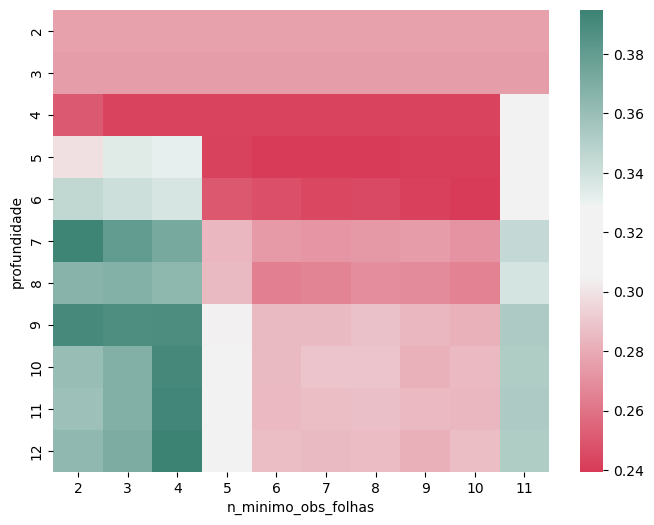

In [81]:
mses = []
ind_i = []
ind_j = []

for i in range(2, 13):
    for j in range(2, 12):
        regr_tree = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        regr_tree.fit(X_train_dummies, y_train)
        mse1 = regr_tree.score(X_test_dummies, y_test)
        mses.append(mse1)
        ind_i.append(i)
        ind_j.append(j)
        
df_mse = pd.DataFrame({'mses':mses, 'profundidade':ind_i, 'n_minimo_obs_folhas':ind_j})

color = sns.diverging_palette(h_neg=6, 
                              h_pos=1250,
                              as_cmap=True,
                              sep = 40, 
                              center = 'light')

sns.heatmap(df_mse.pivot(index='profundidade', columns='n_minimo_obs_folhas', values='mses'), cmap=color)
df_mse.pivot(index='profundidade', columns='n_minimo_obs_folhas', values='mses')

De acordo com os dados observados acima, a profundidade igual a 7 e a menor quantidade de observações por folha igual a 2, geram o menor erro quadrático médio possível.

Portanto a árvore de regressão ajustada será uma com: 
- ```max_depth``` = 7
- ```min_samples_leaf``` = 2

In [84]:
regr_tree = DecisionTreeRegressor(max_depth=7, min_samples_leaf= 2)
regr_tree.fit(X_train_dummies, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=2)

Calculando o valor do $R^2$ para a árvore de regressão ajustada.

In [86]:
y_pred = regr_tree.predict(X_test_dummies)

r_squared = r2_score(y_test, y_pred)

print(f'Coeficiente de Determinação (R²): {round(r_squared, 3)}')

Coeficiente de Determinação (R²): 0.392


O valor do $R^2$ com a árvore de regressão é maior que o valor do mesmo para os modelos criados anteriormente.

Vizualizando a árvore:

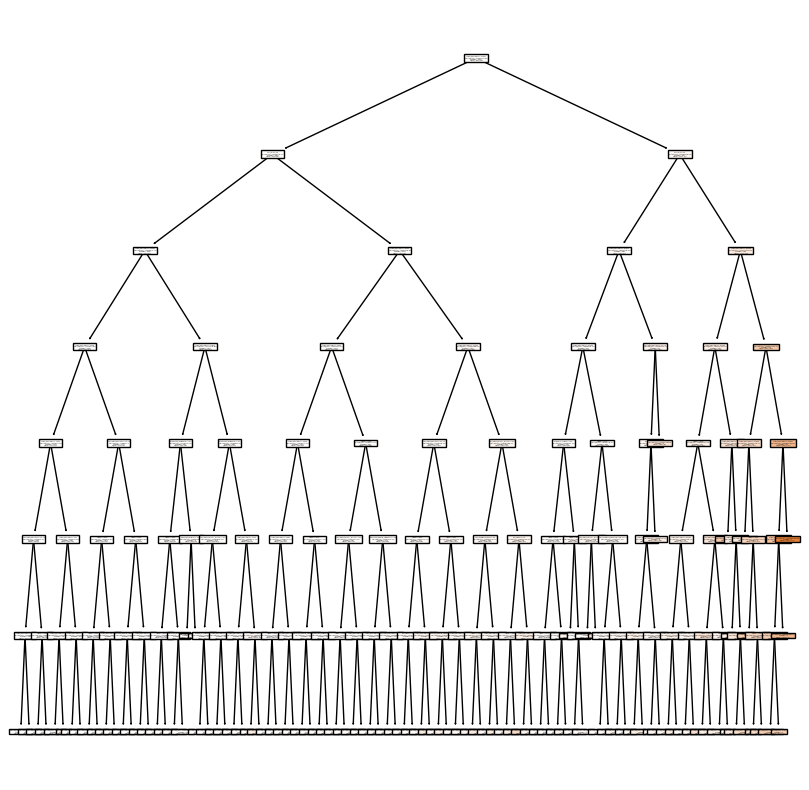

In [89]:
plt.rc('figure', figsize=(10, 10))
tree_plot = tree.plot_tree(regr_tree, 
                           feature_names = X_train_dummies.columns,
                           filled=True) 